In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using triaxial
ellipsoids (model with induced and remanent magnetization)
"""
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_triaxial,ellipsoid_prolate,ellipsoid_oblate

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
# The regional field
inten,inc, dec = 60000., 30, -15
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=0)

## Triaxial

In [3]:
I_l = []
D_l = []
k_l = np.linspace(0.0001, 0.3, 100) # SI

for k in k_l:
    model = [mesher.EllipsoidTriaxial(0.,0.,500.,500.,100.,50.,0.,0.,0., 
                                     {'remanence': [0, 0., 0.],
                                      'k': [k, k, k, 0., 90., 90.]})]

    # Calculate the anomaly for a given regional field
    tf,N1,N2,N3,JRD_ang = ellipsoid_triaxial.tf_c(xp,yp,zp,inten,inc,dec,model)
    I_l.append(JRD_ang[1])
    D_l.append(JRD_ang[2])

cte_inc = np.zeros_like(I_l) + inc
cte_dec = np.zeros_like(I_l) + dec

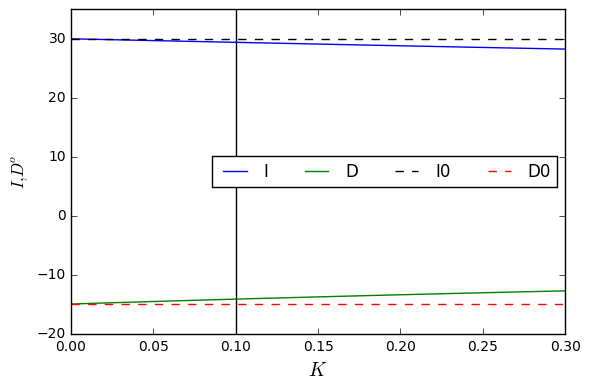

In [4]:
axes = plt.gca()
plt.plot([0.1,0.1], [-20.,35.], 'k-')
plt.plot(k_l,I_l, label='I')
plt.plot(k_l,D_l, label='D')
plt.plot(k_l,cte_inc, '--k', label='I0', )
plt.plot(k_l,cte_dec, '--r', label='D0')
plt.legend(loc='best', ncol=4)
plt.ylabel('$I,D^o$', fontsize=12)
plt.xlabel('$K$', fontsize=14)
axes.set_ylim(-20.,35.)
#axes.set_xlim([0,5])
plt.tight_layout()
#plt.savefig('..\\figures\\test_k_triaxial.jpeg', dpi = 600, facecolor='w', bbox_inches='tight')